In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [6]:
#  3. Convert the June temperatures to a list.

june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
june_results

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date','temperature'])
june_df.set_index(june_df['date'], inplace=True)

june_df.head(20)

,date,temperature
date,,
2010-06-01,2010-06-01,78.0
2010-06-02,2010-06-02,76.0
2010-06-03,2010-06-03,78.0
2010-06-04,2010-06-04,76.0
2010-06-05,2010-06-05,77.0
2010-06-06,2010-06-06,78.0
2010-06-07,2010-06-07,77.0
2010-06-08,2010-06-08,78.0
2010-06-09,2010-06-09,78.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


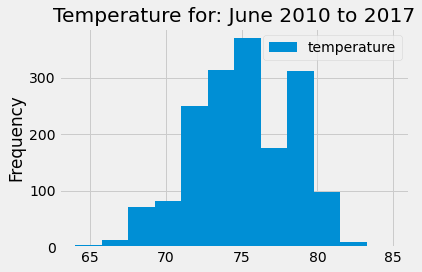

In [9]:
june_df.plot.hist(bins=12)
plt.title("Temperature for: June 2010 to 2017")
plt.tight_layout()
plt.savefig('./resources/junetemp.png')

## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [11]:
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
dec_results

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['date','temperature'])
dec_df.set_index(dec_df['date'], inplace=True)

dec_df.head()

,date,temperature
date,,
2010-12-01,2010-12-01,76.0
2010-12-03,2010-12-03,74.0
2010-12-04,2010-12-04,74.0
2010-12-06,2010-12-06,64.0
2010-12-07,2010-12-07,64.0


In [13]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame.
dec_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


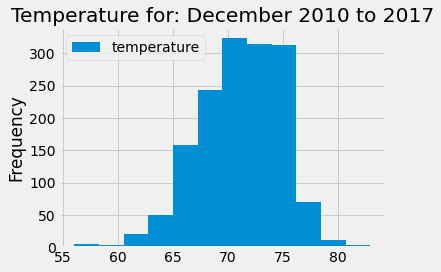

In [14]:
dec_df.plot.hist(bins=12)
plt.title("Temperature for: December 2010 to 2017")
plt.tight_layout()
plt.savefig('./resources/dectemp.png')

# D3: Determine the Precipitation Statistics for June & December

In [15]:
#June precipitation

june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
june_prcp

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [16]:
junprcp_df = pd.DataFrame(june_prcp, columns=['date','precipitation'])
#junprcp_df = pd.DataFrame(june_prcp, columns=['date','precipitation']).dropna()
junprcp_df.set_index(junprcp_df['date'], inplace=True)
junprcp_df.head()

,date,precipitation
date,,
2010-06-01,2010-06-01,0.00
2010-06-02,2010-06-02,0.01
2010-06-03,2010-06-03,0.00
2010-06-04,2010-06-04,0.00
2010-06-05,2010-06-05,0.00


In [17]:
junprcp_df = junprcp_df.sort_index()

print(junprcp_df.to_string(index=False))

       date  precipitation
 2010-06-01           0.00
 2010-06-01           0.01
 2010-06-01           0.00
 2010-06-01            NaN
 2010-06-01           0.03
 2010-06-01           0.00
 2010-06-01           0.00
 2010-06-01           0.08
 2010-06-01           0.03
 2010-06-02           0.00
 2010-06-02           0.03
 2010-06-02           0.00
 2010-06-02           0.00
 2010-06-02           0.03
 2010-06-02           0.00
 2010-06-02           0.00
 2010-06-02           0.00
 2010-06-02           0.01
 2010-06-03           0.00
 2010-06-03           0.00
 2010-06-03           0.10
 2010-06-03           0.00
 2010-06-03           0.14
 2010-06-03           0.00
 2010-06-03           0.00
 2010-06-03           0.00
 2010-06-03           0.00
 2010-06-04           0.00
 2010-06-04           0.00
 2010-06-04           0.00
 2010-06-04           0.00
 2010-06-04           0.00
 2010-06-04           0.01
 2010-06-04           0.00
 2010-06-04           0.00
 2010-06-04           0.00
 

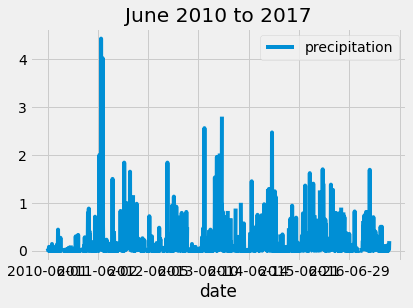

In [18]:
junprcp_df.plot()
plt.title("June 2010 to 2017")
#plt.tight_layout()
plt.savefig('./resources/juneprcp.png')

In [19]:
junprcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [20]:
#Dec precipitation

decprcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
decprcp

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0),
 ('2010-12-13', 0.0),
 ('2010-12-14', 0.0),
 ('2010-12-15', 0.0),
 ('2010-12-16', 0.0),
 ('2010-12-17', 0.0),
 ('2010-12-18', 0.0),
 ('2010-12-19', 1.4),
 ('2010-12-23', 0.0),
 ('2010-12-24', 0.0),
 ('2010-12-26', None),
 ('2010-12-27', 0.13),
 ('2010-12-28', 0.55),
 ('2010-12-29', 0.06),
 ('2010-12-30', 0.01),
 ('2010-12-31', 0.0),
 ('2011-12-01', 0.03),
 ('2011-12-02', 0.08),
 ('2011-12-03', 0.0),
 ('2011-12-04', 0.0),
 ('2011-12-05', 0.0),
 ('2011-12-06', 0.0),
 ('2011-12-07', 0.0),
 ('2011-12-08', 0.0),
 ('2011-12-09', 0.13),
 ('2011-12-10', 0.07),
 ('2011-12-11', 0.07),
 ('2011-12-12', 0.08),
 ('2011-12-13', 0.4),
 ('2011-12-14', 0.7),
 ('2011-12-15', 0.0),
 ('2011-12-16', 0.01),
 ('2011-12-17', 0.07),
 ('2011-12-18', 0.02),
 ('2011-12-19', 0.15),
 ('2011-12-20'

In [21]:
decprcp_df = pd.DataFrame(decprcp, columns=['date','precipitation'])
decprcp_df.set_index(decprcp_df['date'], inplace=True)
decprcp_df.head()

,date,precipitation
date,,
2010-12-01,2010-12-01,0.04
2010-12-03,2010-12-03,0.00
2010-12-04,2010-12-04,0.00
2010-12-06,2010-12-06,0.00
2010-12-07,2010-12-07,0.00


In [22]:
decprcp_df = decprcp_df.sort_index()

print(decprcp_df.to_string(index=False))

       date  precipitation
 2010-12-01           0.04
 2010-12-01           0.03
 2010-12-01           0.70
 2010-12-01           0.03
 2010-12-01           1.35
 2010-12-01           0.13
 2010-12-01           1.48
 2010-12-01           0.76
 2010-12-02            NaN
 2010-12-02           0.16
 2010-12-02           0.06
 2010-12-02           0.26
 2010-12-02           0.00
 2010-12-02           0.13
 2010-12-02           0.02
 2010-12-02           0.18
 2010-12-03           1.59
 2010-12-03           0.01
 2010-12-03           0.78
 2010-12-03           0.00
 2010-12-03           0.22
 2010-12-03           0.01
 2010-12-03           0.47
 2010-12-03           0.16
 2010-12-04           0.00
 2010-12-04           0.00
 2010-12-04           0.19
 2010-12-04           0.00
 2010-12-04           0.00
 2010-12-04           0.00
 2010-12-04           0.00
 2010-12-05           0.00
 2010-12-05           0.00
 2010-12-05           0.00
 2010-12-05           0.00
 2010-12-05           0.00
 

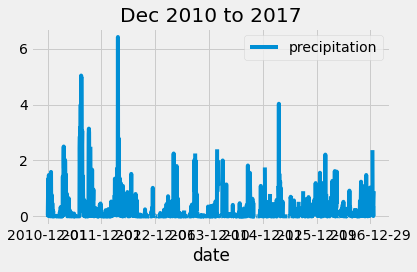

In [23]:
decprcp_df.plot()
plt.title("Dec 2010 to 2017")
plt.tight_layout()
plt.savefig('./resources/decprcp.png')

In [24]:
decprcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
